# Explonatory Data Analisys - Call Center Performance
# Álvaro Sánchez Martín


In [1]:
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd
import seaborn as sns

# ENTENDIMIENTO DE LOS DATOS

In [2]:
#Análisis exploratorio inicial
#Carga del dataset
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/EDA_Entrega/src/data/Call Center.csv")

#Visualización del dataset
df

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/05/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/04/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA
...,...,...,...,...,...,...,...,...,...,...,...,...
32936,BRM-96715111-h-155613-wO,Othelia Ouldcott,Neutral,NaN,10/30/2020,Billing Question,Oklahoma City,Oklahoma,Web,Within SLA,13,Denver/CO
32937,UJH-96531654-y-074703-H4,Tasha Cubbinelli,Negative,NaN,10/07/2020,Billing Question,Crawfordsville,Indiana,Chatbot,Within SLA,42,Baltimore/MD
32938,WDS-58440679-I-064360-TT,Margaux Slaten,Negative,NaN,10/04/2020,Billing Question,Lehigh Acres,Florida,Chatbot,Within SLA,30,Baltimore/MD
32939,FTZ-87704815-T-824288-iC,Odey Seed,Positive,8.0,10/27/2020,Payments,Salt Lake City,Utah,Call-Center,Within SLA,38,Baltimore/MD


In [5]:
df.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/05/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/04/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [6]:
#Búsqueda de valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32941 non-null  object 
 1   customer_name             32941 non-null  object 
 2   sentiment                 32941 non-null  object 
 3   csat_score                12271 non-null  float64
 4   call_timestamp            32941 non-null  object 
 5   reason                    32941 non-null  object 
 6   city                      32941 non-null  object 
 7   state                     32941 non-null  object 
 8   channel                   32941 non-null  object 
 9   response_time             32941 non-null  object 
 10  call duration in minutes  32941 non-null  int64  
 11  call_center               32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

id                              0
customer_name                   0
sentiment                       0
csat_score                  20670
call_timestamp                  0
reason                          0
city                            0
state                           0
channel                         0
response_time                   0
call duration in minutes        0
call_center                     0
dtype: int64

***Se observa que solo hay nulos en la columna "csat_score" lo cual es lógico ya que no todos los clientes tienden a valorar el contacto.***
***Aún así, disponemos de la columna "sentiment" que está relacionada con la satisfacción del cliente, por lo que la usaremos para rellenar la columna de CSAT con la media de los valores de "sentiment".***

# Tabla de Variables

| Variable                  | Tipo de Dato   | Descripción                                                                 |
|---------------------------|----------------|-----------------------------------------------------------------------------|
| `id`                     | String         | Identificador único del contacto.                                            |
| `customer_name`          | String         | Nombre del cliente que realizó el contacto.                                  |
| `sentiment`              | Categórico     | Sentimiento del cliente hacia el servicio (`Very Positive`,`Negative`,etc ). |
| `csat_score`             | Numérico       | Puntuación de la satisfacción del cliente (1-10).                            |
| `call_timestamp`         | Fecha/Datetime | Fecha en la que se realizó el contacto.                                      |
| `reason`                 | Categórico     | Razón del contacto (`Billing Question`, `Payments`, etc.).                |
| `city`                   | String         | Ciudad desde donde llamó el cliente.                                       |
| `state`                  | String         | Estado desde donde llamó el cliente.                                       |
| `channel`                | Categórico     | Canal utilizado para el contacto (`Call-Center`, `Chatbot`, etc.).          |
| `response_time`          | Categórico     | Tiempo de respuesta (`Within SLA`, `Above SLA`).                           |
| `call duration in minutes` | Numérico       | Duración de la llamada en minutos.                                         |
| `call_center`            | String         | Centro de llamadas que gestionó el contacto.                                |


# LIMPIEZA DE DATOS

In [10]:
#Prepocesamiento
#Conversión a formato datetime de la columna "call_timestamp"
df["call_timestamp"] = pd.to_datetime(df["call_timestamp"], format="%m/%d/%Y")
df = df.sort_values(by="call_timestamp")

In [ ]:
#Eliminación la columna "id" ya que para este análisis no la necesitamos
df = df.drop(columns = "id")

In [14]:
#Relleno de la columna "csat_score" con la media de los valores únicos de "sentiment"
media_sentiment = df.groupby('sentiment')['csat_score'].mean()
media_sentiment

sentiment
Negative         4.528131
Neutral          6.473039
Positive         7.993298
Very Negative    2.457381
Very Positive    9.493484
Name: csat_score, dtype: float64

In [15]:
#Imputación de los valores faltantes en "csat_score"
df['csat_score'] = df['csat_score'].fillna(df['sentiment'].map(media_sentiment))

#Comprobación de que no quedan valores nulos
df.isnull().sum()

customer_name               0
sentiment                   0
csat_score                  0
call_timestamp              0
reason                      0
city                        0
state                       0
channel                     0
response_time               0
call duration in minutes    0
call_center                 0
dtype: int64

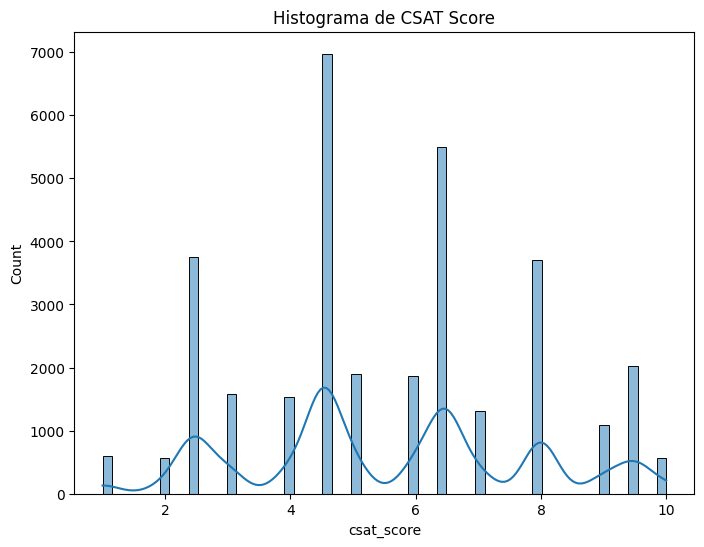

In [10]:
#Detección de outliers
# Visualización: Histogramas
plt.figure(figsize=(8, 6))
sns.histplot(df['csat_score'], kde=True)
plt.title("Histograma de CSAT Score")
plt.show()

In [12]:
# Resumen estadístico para identificar cuartiles, rango, mínimo y máximo
df['csat_score'].describe()

count    32941.000000
mean         5.557205
std          2.222764
min          1.000000
25%          4.528131
50%          5.000000
75%          7.000000
max         10.000000
Name: csat_score, dtype: float64

# ANÁLISIS
## Análisis univariante

In [35]:
#Visualización de valores únicos y frecuencias.
columnas = ["reason","channel", "call_center"]
# Calcular frecuencias para cada columna
for columna in columnas:
    print(f"\nFrecuencias para la columna '{columna}':")
    
    # Frecuencia absoluta
    frecuencia_absoluta = df[columna].value_counts()
    print("Frecuencia Absoluta:")
    print(frecuencia_absoluta)
    
    # Frecuencia relativa
    frecuencia_relativa = df[columna].value_counts(normalize=True) * 100
    print("\nFrecuencia Relativa (%):")
    print(frecuencia_relativa)


Frecuencias para la columna 'reason':
Frecuencia Absoluta:
reason
Billing Question    23462
Payments             4749
Service Outage       4730
Name: count, dtype: int64

Frecuencia Relativa (%):
reason
Billing Question    71.224310
Payments            14.416684
Service Outage      14.359005
Name: proportion, dtype: float64

Frecuencias para la columna 'channel':
Frecuencia Absoluta:
channel
Call-Center    10639
Chatbot         8256
Email           7470
Web             6576
Name: count, dtype: int64

Frecuencia Relativa (%):
channel
Call-Center    32.297137
Chatbot        25.062991
Email          22.676907
Web            19.962964
Name: proportion, dtype: float64

Frecuencias para la columna 'call_center':
Frecuencia Absoluta:
call_center
Los Angeles/CA    13734
Baltimore/MD      11012
Chicago/IL         5419
Denver/CO          2776
Name: count, dtype: int64

Frecuencia Relativa (%):
call_center
Los Angeles/CA    41.692723
Baltimore/MD      33.429465
Chicago/IL        16.450624
Denver

In [21]:
df

,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
16470,Harlen Aspole,Neutral,8.000000,2020-10-01,Billing Question,Buffalo,New York,Email,Within SLA,43,Denver/CO
27559,Alisun Sturmey,Positive,8.000000,2020-10-01,Billing Question,Charlottesville,Virginia,Email,Above SLA,13,Chicago/IL
10591,Salmon Cacacie,Very Negative,1.000000,2020-10-01,Billing Question,Houston,Texas,Chatbot,Within SLA,7,Denver/CO
7310,Amalle Coggen,Negative,5.000000,2020-10-01,Billing Question,Mobile,Alabama,Email,Within SLA,32,Chicago/IL
7317,Aurelie Lovstrom,Very Negative,2.457381,2020-10-01,Billing Question,Washington,District of Columbia,Chatbot,Below SLA,16,Los Angeles/CA
...,...,...,...,...,...,...,...,...,...,...,...
17462,Brittaney Merritt,Negative,4.528131,2020-10-30,Billing Question,Saint Paul,Minnesota,Email,Within SLA,7,Baltimore/MD
17494,Adelaida Girardi,Neutral,6.473039,2020-10-30,Billing Question,East Saint Louis,Illinois,Email,Within SLA,42,Chicago/IL
17371,Casey Joscelyne,Very Negative,2.457381,2020-10-30,Billing Question,Amarillo,Texas,Call-Center,Below SLA,35,Baltimore/MD
32940,Mozelle Berlin,Negative,4.528131,2020-10-30,Billing Question,Phoenix,Arizona,Call-Center,Within SLA,23,Baltimore/MD


# ANÁLISIS BIVARIANTE

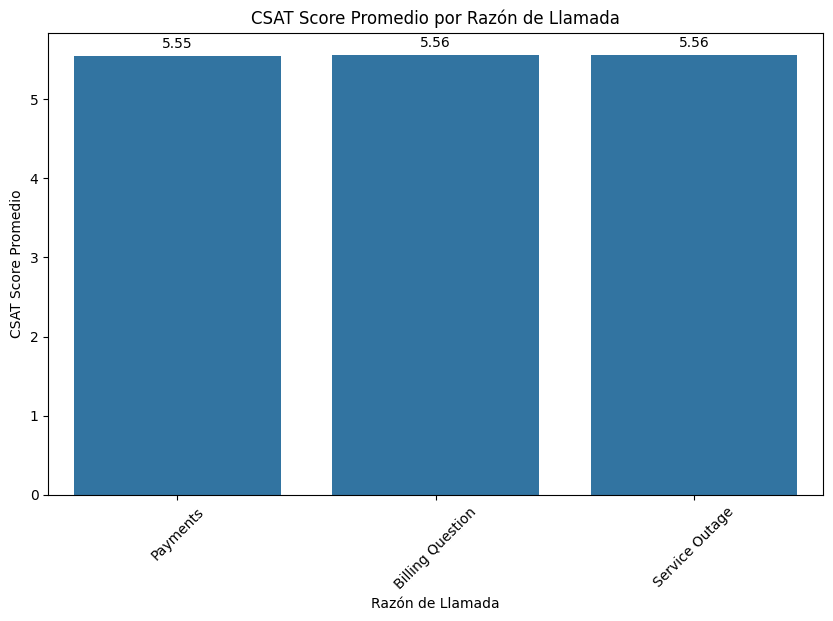

In [32]:
# Calcular la media de CSAT para cada razón
reason_summary = df.groupby('reason')['csat_score'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=reason_summary.index, y=reason_summary.values, errorbar=None)

for i, v in enumerate(reason_summary.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')
    
plt.title("CSAT Score Promedio por Razón de Llamada")
plt.xlabel("Razón de Llamada")
plt.ylabel("CSAT Score Promedio")
plt.xticks(rotation=45)
plt.show()


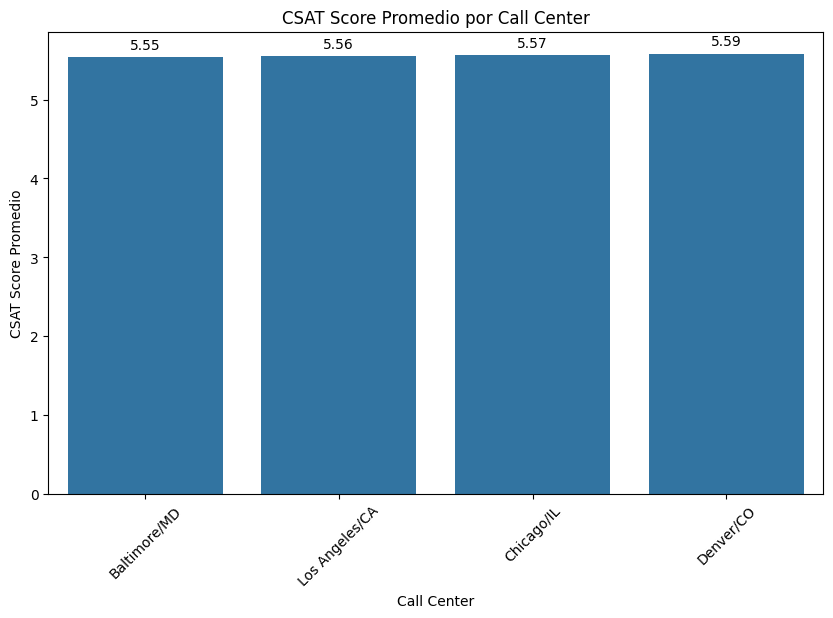

In [34]:
call_center_summary = df.groupby('call_center')['csat_score'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=call_center_summary.index, y=call_center_summary.values, errorbar=None)
for i, v in enumerate(call_center_summary.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')
plt.title("CSAT Score Promedio por Call Center")
plt.xlabel("Call Center")
plt.ylabel("CSAT Score Promedio")
plt.xticks(rotation=45)
plt.show()

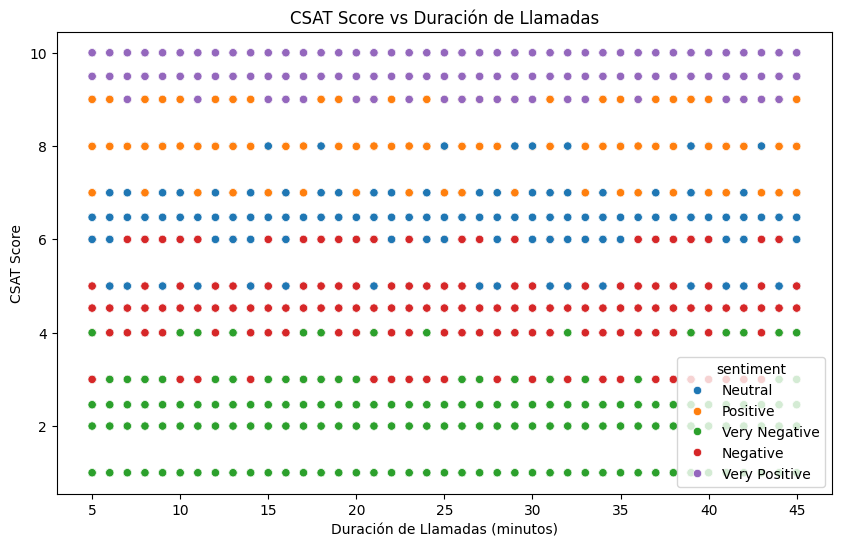

In [23]:
# Relación entre CSAT Score y la duración de las llamadas
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='call duration in minutes', y='csat_score', hue='sentiment')
plt.title("CSAT Score vs Duración de Llamadas")
plt.xlabel("Duración de Llamadas (minutos)")
plt.ylabel("CSAT Score")
plt.show()

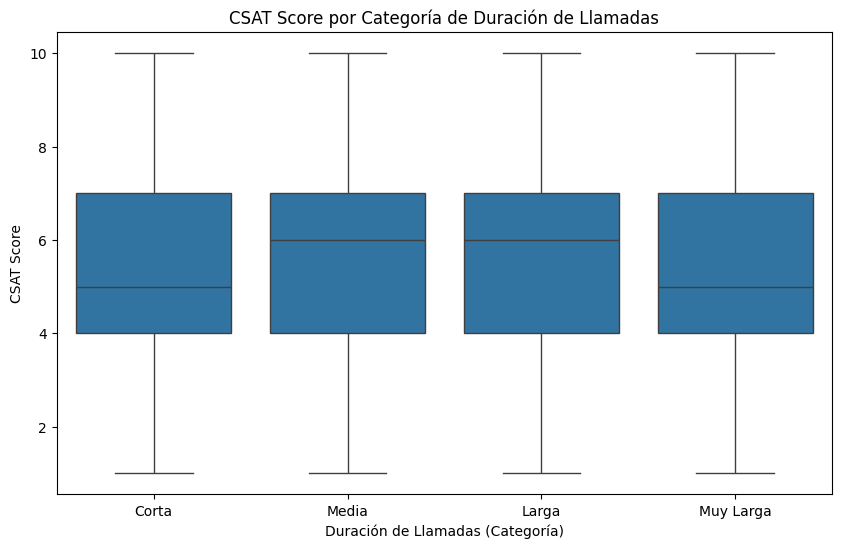

In [4]:
# Boxplot para ver cómo varía CSAT Score según la duración de las llamadas (agrupadas por cuartiles)
df['call_duration_category'] = pd.qcut(df['call duration in minutes'], q=4, labels=["Corta", "Media", "Larga", "Muy Larga"])
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='call_duration_category', y='csat_score')
plt.title("CSAT Score por Categoría de Duración de Llamadas")
plt.xlabel("Duración de Llamadas (Categoría)")
plt.ylabel("CSAT Score")
plt.show()

Frecuencia Relativa (%) entre Sentiment y Reason:
sentiment          Negative    Neutral   Positive  Very Negative  \
reason                                                             
Billing Question  33.535078  26.562100  11.827636      18.327508   
Payments          33.543904  26.068646  11.623500      18.888187   
Service Outage    33.868922  27.145877  12.706131      17.526427   

sentiment         Very Positive  
reason                           
Billing Question       9.747677  
Payments               9.875763  
Service Outage         8.752643  


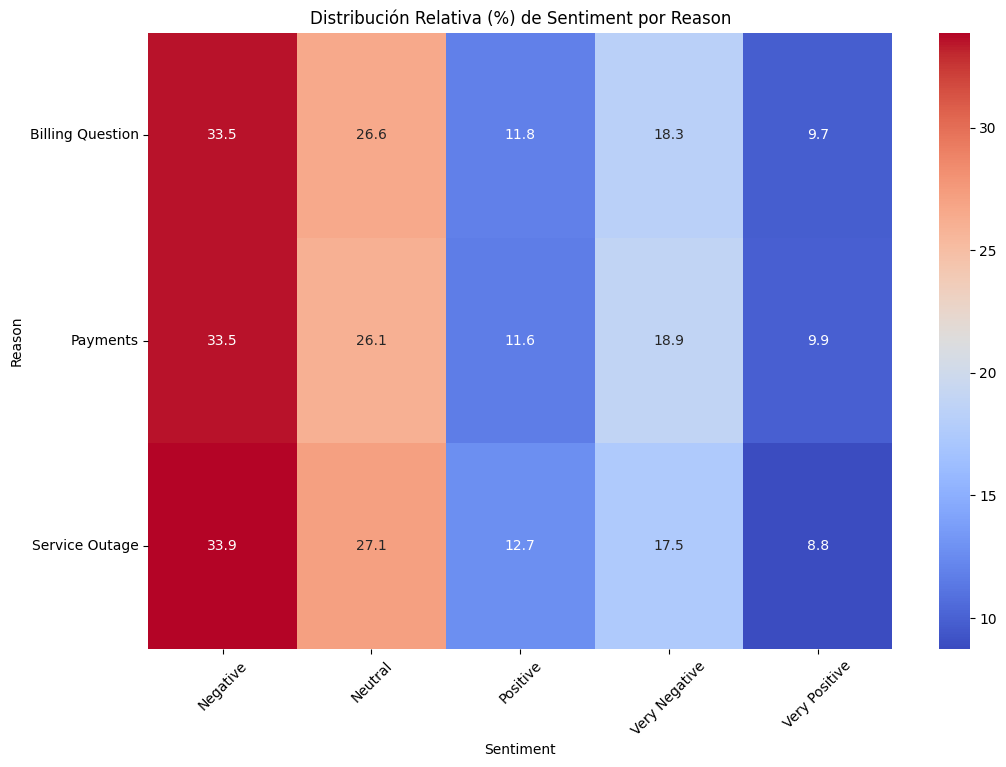

In [38]:
# Tabla de frecuencias cruzadas
sentiment_reason_crosstab = pd.crosstab(df['reason'], df['sentiment'], normalize='index') * 100

# Mostrar la tabla de frecuencias cruzadas
print("Frecuencia Relativa (%) entre Sentiment y Reason:")
print(sentiment_reason_crosstab)

# Heatmap para visualizar la relación
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_reason_crosstab, annot=True, cmap="coolwarm", fmt=".1f", cbar=True)
plt.title("Distribución Relativa (%) de Sentiment por Reason")
plt.xlabel("Sentiment")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Frecuencia Relativa (%) entre Sentiment y Call Center:
sentiment        Negative    Neutral   Positive  Very Negative  Very Positive
call_center                                                                  
Baltimore/MD    33.699600  26.580094  11.705412      18.389030       9.625863
Chicago/IL      33.936151  26.665436  11.699576      17.936889       9.761949
Denver/CO       32.853026  28.818444  11.851585      17.723343       8.753602
Los Angeles/CA  33.500801  26.081258  12.203291      18.472404       9.742246


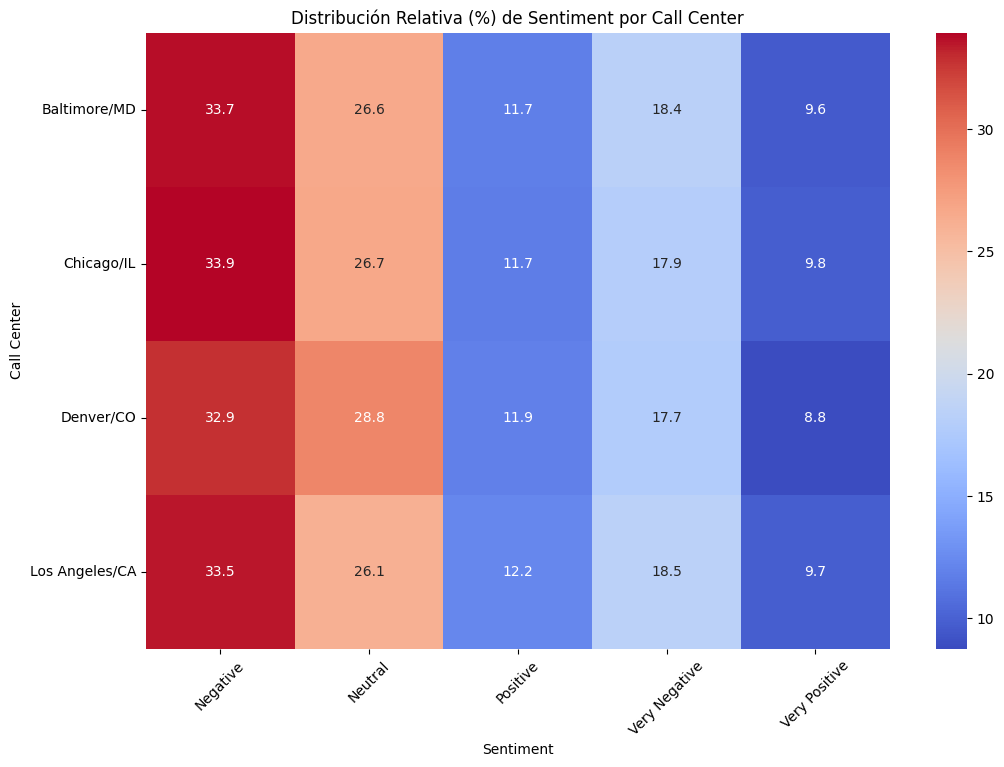

In [39]:
sentiment_call_center_crosstab = pd.crosstab(df['call_center'], df['sentiment'], normalize='index') * 100

# Mostrar la tabla de frecuencias cruzadas
print("Frecuencia Relativa (%) entre Sentiment y Call Center:")
print(sentiment_call_center_crosstab)

# Heatmap para visualizar la relación
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_call_center_crosstab, annot=True, cmap="coolwarm", fmt=".1f", cbar=True)
plt.title("Distribución Relativa (%) de Sentiment por Call Center")
plt.xlabel("Sentiment")
plt.ylabel("Call Center")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Frecuencia Absoluta entre Sentiment y Call Center:
sentiment       Negative  Neutral  Positive  Very Negative  Very Positive
call_center                                                              
Baltimore/MD        3711     2927      1289           2025           1060
Chicago/IL          1839     1445       634            972            529
Denver/CO            912      800       329            492            243
Los Angeles/CA      4601     3582      1676           2537           1338


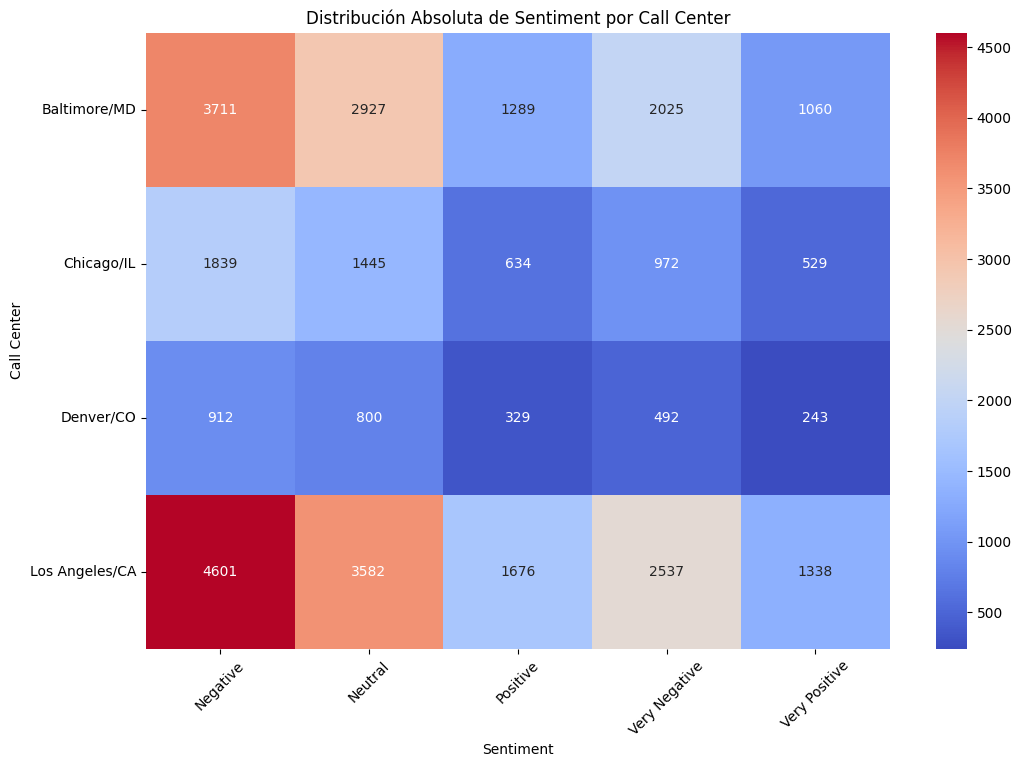

In [40]:
# Tabla de frecuencias absolutas
sentiment_call_center_absolute = pd.crosstab(df['call_center'], df['sentiment'])

# Mostrar la tabla de frecuencias absolutas
print("Frecuencia Absoluta entre Sentiment y Call Center:")
print(sentiment_call_center_absolute)

# Heatmap para visualizar la relación
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_call_center_absolute, annot=True, cmap="coolwarm", fmt="d", cbar=True)
plt.title("Distribución Absoluta de Sentiment por Call Center")
plt.xlabel("Sentiment")
plt.ylabel("Call Center")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()